<a href="https://colab.research.google.com/github/vadlamani-s/technical-portfolio/blob/master/LanguageTranslation_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install fasttext

     |████████████████████████████████| 71kB 775kB/s 
  Created wheel for fasttext: filename=fasttext-0.9.2-cp36-cp36m-linux_x86_64.whl size=3041483 sha256=6df3396bcc5cc860611d85b37b03e92b4776a0dfeca9ada872c0c66c000477cc
  Stored in directory: /root/.cache/pip/wheels/98/ba/7f/b154944a1cf5a8cee91c154b75231136cc3a3321ab0e30f592
Successfully built fasttext


In [83]:
import string
import re
from numpy import array, argmax, random, take
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, RepeatVector
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from keras import optimizers
from keras import initializers
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import zeros
from numpy import asarray
import fasttext.util
from collections import Counter
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from nltk.translate.bleu_score import corpus_bleu

#Package for Language Identification


In [3]:
## Language identification model for identifying the language in the data
!wget https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin

--2020-11-24 20:12:11--  https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.74.142, 172.67.9.4, 104.22.75.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.74.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 131266198 (125M) [application/octet-stream]
Saving to: ‘lid.176.bin’

lid.176.bin         100%[===================>] 125.18M  87.6MB/s    in 1.4s    

2020-11-24 20:12:13 (87.6 MB/s) - ‘lid.176.bin’ saved [131266198/131266198]



#French and Haitain Word Embedding

In [5]:
## French Word Embedding from fasttext
fasttext.util.download_model('fr', if_exists='ignore')
ft = fasttext.load_model('cc.fr.300.bin')

In [6]:
## Haitain Word Embedding from fasttext
fasttext.util.download_model('ht', if_exists='ignore')
ft_ht = fasttext.load_model('cc.ht.300.bin')

Buffered data was truncated after reaching the output size limit.

#Language Identification

In [7]:
## Loading the language model
pretrained_lang_model = "lid.176.bin"
model_language = fasttext.load_model(pretrained_lang_model)

In [8]:
def reading_to_dataframe(file):
  df = pd.read_csv(file)
  df = df.iloc[:,2:4].dropna()
  df.reset_index(inplace=True, drop = True)
  df['message'] = df['message'].str.lower()
  df['original'] = df['original'].str.lower()
  return df

In [22]:
train_path = "/content/disaster_response_messages_training.csv"
validation_path = "/content/disaster_response_messages_validation.csv"
test_path = "/content/disaster_response_messages_test.csv"
df_train = reading_to_dataframe(train_path)
df_validation = reading_to_dataframe(validation_path)
df_test = reading_to_dataframe(test_path)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


#Language Labelling

In [23]:
list_train = list()
for sentence in df_train['original']:
  list_train.append(model_language.predict(sentence, k = 2)[0][0])
print(Counter(list_train))

Counter({'__label__fr': 2312, '__label__tl': 1160, '__label__ht': 972, '__label__en': 881, '__label__la': 213, '__label__ro': 205, '__label__hr': 168, '__label__pl': 158, '__label__es': 150, '__label__tr': 131, '__label__de': 127, '__label__ku': 115, '__label__nl': 109, '__label__pms': 104, '__label__wa': 103, '__label__jv': 91, '__label__eo': 88, '__label__br': 87, '__label__cy': 76, '__label__it': 73, '__label__su': 64, '__label__sq': 55, '__label__vi': 55, '__label__ca': 53, '__label__id': 49, '__label__pt': 46, '__label__sw': 43, '__label__war': 41, '__label__sl': 34, '__label__ms': 24, '__label__no': 23, '__label__hu': 20, '__label__ie': 20, '__label__ceb': 19, '__label__io': 18, '__label__sh': 17, '__label__kw': 16, '__label__fi': 14, '__label__fy': 14, '__label__et': 13, '__label__mg': 12, '__label__mt': 12, '__label__gn': 11, '__label__sr': 11, '__label__sv': 11, '__label__ur': 10, '__label__cs': 10, '__label__eu': 10, '__label__bs': 9, '__label__sc': 7, '__label__cbk': 7, '__l

In [24]:
len(Counter(list_train))

97

In [25]:
list_validation = list()
for sentence in df_validation['original']:
  list_validation.append(model_language.predict(sentence, k = 2)[0][0])
print(Counter(list_validation))

Counter({'__label__fr': 287, '__label__tl': 132, '__label__en': 109, '__label__ht': 106, '__label__la': 32, '__label__es': 28, '__label__ro': 24, '__label__tr': 19, '__label__ku': 17, '__label__hr': 16, '__label__pl': 16, '__label__nl': 15, '__label__de': 13, '__label__wa': 13, '__label__it': 11, '__label__su': 11, '__label__sq': 11, '__label__eo': 10, '__label__br': 10, '__label__jv': 9, '__label__pms': 8, '__label__sw': 7, '__label__no': 6, '__label__pt': 6, '__label__id': 5, '__label__sl': 5, '__label__vi': 5, '__label__ca': 5, '__label__kw': 4, '__label__cy': 3, '__label__bcl': 3, '__label__fy': 3, '__label__ms': 3, '__label__cs': 2, '__label__ur': 2, '__label__gl': 2, '__label__eml': 2, '__label__sr': 2, '__label__diq': 2, '__label__so': 1, '__label__mwl': 1, '__label__ceb': 1, '__label__sh': 1, '__label__mg': 1, '__label__cbk': 1, '__label__sc': 1, '__label__gn': 1, '__label__mt': 1, '__label__is': 1, '__label__li': 1, '__label__ilo': 1, '__label__war': 1, '__label__fi': 1, '__la

In [26]:
list_test = list()
for sentence in df_test['original']:
  list_test.append(model_language.predict(sentence, k = 2)[0][0])
print(Counter(list_test))

Counter({'__label__fr': 281, '__label__tl': 144, '__label__ht': 129, '__label__en': 98, '__label__la': 37, '__label__es': 30, '__label__ro': 25, '__label__hr': 24, '__label__de': 20, '__label__nl': 19, '__label__ku': 14, '__label__br': 14, '__label__pms': 12, '__label__wa': 11, '__label__eo': 11, '__label__su': 11, '__label__pl': 10, '__label__ca': 10, '__label__jv': 9, '__label__tr': 8, '__label__war': 7, '__label__sq': 7, '__label__it': 6, '__label__sw': 5, '__label__id': 5, '__label__vi': 4, '__label__sl': 4, '__label__cy': 4, '__label__ms': 3, '__label__ceb': 3, '__label__oc': 3, '__label__ie': 3, '__label__no': 3, '__label__fi': 3, '__label__gu': 2, '__label__gv': 2, '__label__pt': 2, '__label__gn': 2, '__label__eu': 2, '__label__hu': 2, '__label__fy': 1, '__label__ilo': 1, '__label__tk': 1, '__label__sh': 1, '__label__mg': 1, '__label__sco': 1, '__label__yo': 1, '__label__nds': 1, '__label__bs': 1, '__label__lmo': 1, '__label__mt': 1, '__label__mrj': 1, '__label__qu': 1, '__label

Since, the highest number of sentences in the training, validation and test set are in the French and Haitian language, I used the pre trained French and Haitian embedding from fasttext library.

Adding the labels to the Dataframe

In [27]:
df_train['label'] = list_train
df_validation['label'] = list_validation
df_test['label'] = list_test

Removed all the other languages from training, validation and test sets apart from French and Haitain.

In [28]:
df_train = df_train[(df_train['label'] == "__label__fr") | (df_train['label'] == "__label__tl") | (df_train['label'] == "__label__ht")]
df_train.reset_index(inplace=True, drop = True)
df_validation = df_validation[(df_validation['label'] == "__label__fr") | (df_validation['label'] == "__label__tl") | (df_validation['label'] == "__label__ht")]
df_validation.reset_index(inplace=True, drop = True)
df_test = df_test[(df_test['label'] == "__label__fr") | (df_test['label'] == "__label__tl") | (df_test['label'] == "__label__ht")]
df_test.reset_index(inplace=True, drop = True)

In [30]:
df = df_train
df = df.append(df_validation)
df.reset_index(inplace=True, drop=True)

#Tokenization of the Data using Keras, removing all the punctuations
---

In [31]:
def tokenization(lines):
  tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
  tokenizer.fit_on_texts(lines)
  return tokenizer

In [32]:
tokenizer_message_train = tokenization(df['message'])
tokenizer_original_train = tokenization(df['original'])

In [78]:
list(tokenizer_original_train.word_index.items())[10:16]

[('la', 11), ('se', 12), ('gen', 13), ('moun', 14), ('sa', 15), ('ka', 16)]

In [33]:
vocabulary_size_original = len(tokenizer_original_train.word_index) + 1
vocabulary_size_message = len(tokenizer_message_train.word_index) + 1
max_original_sent_length = df['message'].str.split().str.len().max()
max_message_sent_length = df['original'].str.split().str.len().max()

In [34]:
print("Max vocabulary length of multi-lingual data :", vocabulary_size_original)
print("Max vocabulary length of english data :", vocabulary_size_message)
print("Max sentence length of multi-lingual data :", max_original_sent_length)
print("Max sentence length of english data :", max_message_sent_length)

Max vocabulary length of multi-lingual data : 11246
Max vocabulary length of english data : 7567
Max sentence length of multi-lingual data : 71
Max sentence length of english data : 58


#Encoding sequences and padding with zero's

---

In [35]:
def encode_sequences(tokenizer, max_length, sentences):
  seq = tokenizer.texts_to_sequences(sentences)
  seq = pad_sequences(seq, maxlen=max_length, padding='post')
  return seq

In [36]:
encode_message = encode_sequences(tokenizer_message_train, max_message_sent_length, df_train['message'])
encode_original = encode_sequences(tokenizer_original_train, max_original_sent_length, df_train['original'])
encode_message_validate = encode_sequences(tokenizer_message_train, max_message_sent_length, df_validation['message'])
encode_original_validate = encode_sequences(tokenizer_original_train, max_original_sent_length, df_validation['original'])

In [39]:
encode_message[0:50]

array([[ 652, 3219,    6, ...,    0,    0,    0],
       [  11,    1,  697, ...,    0,    0,    0],
       [ 384,  583,  584, ...,    0,    0,    0],
       ...,
       [   5,   10,    6, ...,    0,    0,    0],
       [  56,   34,  129, ...,    0,    0,    0],
       [   2,   43,   41, ...,    0,    0,    0]], dtype=int32)

In [38]:
encode_message.shape

(4998, 58)

#Building Embedded Matrix

---



In [40]:
import numpy as np
def create_embedded_matrix(embedding_matrix, tokenizer):
  for word, index in tokenizer.word_index.items():
    embedding_vector = ft.get_word_vector(word)
    if np.all(embedding_vector) == 0:
      embedded_matrix[index] = ft_ht.get_word_vector(word)
      continue
    embedding_matrix[index] = embedding_vector
  return embedding_matrix

In [41]:
embedded_matrix = zeros((vocabulary_size_original, 300))
embedded_matrix = create_embedded_matrix(embedded_matrix, tokenizer_original_train)

In [43]:
embedded_matrix[:50]

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.11999285, -0.17744699, -0.07027676, ..., -0.0160699 ,
        -0.14665967,  0.01236633],
       [ 0.04646803,  0.01604446, -0.08522566, ..., -0.1245033 ,
        -0.05036523, -0.04511029],
       ...,
       [ 0.00065746, -0.10116724, -0.11052603, ..., -0.17531082,
         0.16553444,  0.00861332],
       [ 0.06718589, -0.00148281,  0.01460444, ...,  0.133968  ,
         0.01425537,  0.02254672],
       [-0.13507535, -0.07703584,  0.03156791, ..., -0.12189899,
         0.00691818,  0.09448737]])

In [44]:
embedded_matrix.shape

(11246, 300)

In [45]:
# Deleting the variables
del ft
del ft_ht

#Building the Model

---

In [46]:
## Since a pre-trained embeddings are being used, the embedding layer doesnt have to be trained. 
model = Sequential()
embedding_dimension = 300
embedding_layer = Embedding(vocabulary_size_original, embedding_dimension, weights = [embedded_matrix], 
                            input_length=max_original_sent_length, trainable = False)

In [47]:
units = 256
model.add(embedding_layer)
model.add(LSTM(units))
model.add(RepeatVector(max_message_sent_length))
model.add(LSTM(units, return_sequences=True))
model.add(Dense(vocabulary_size_message, activation='softmax'))
rms = optimizers.RMSprop(lr=0.001)
model.compile(optimizer=rms, loss='sparse_categorical_crossentropy')

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 71, 300)           3373800   
_________________________________________________________________
lstm (LSTM)                  (None, 256)               570368    
_________________________________________________________________
repeat_vector (RepeatVector) (None, 58, 256)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 58, 256)           525312    
_________________________________________________________________
dense (Dense)                (None, 58, 7567)          1944719   
Total params: 6,414,199
Trainable params: 3,040,399
Non-trainable params: 3,373,800
_________________________________________________________________


In [49]:
filename = 'model_new.h5'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
earlystopping = EarlyStopping(monitor='val_loss', mode = 'min', verbose = 1, patience = 20)

In [81]:
history = model.fit(encode_original, encode_message, batch_size=64, validation_data=(encode_original_validate, encode_message_validate),
        verbose = 1, callbacks = [checkpoint, earlystopping], epochs = 100)

Epoch 1/100
78/79 [============================>.] - ETA: 0s - loss: 1.8614
Epoch 00001: val_loss did not improve from 2.06260
79/79 [==============================] - 5s 67ms/step - loss: 1.8608 - val_loss: 2.1327
Epoch 2/100
78/79 [============================>.] - ETA: 0s - loss: 1.8614
Epoch 00002: val_loss did not improve from 2.06260
79/79 [==============================] - 5s 66ms/step - loss: 1.8620 - val_loss: 2.1034
Epoch 3/100
78/79 [============================>.] - ETA: 0s - loss: 1.8556
Epoch 00003: val_loss did not improve from 2.06260
79/79 [==============================] - 5s 67ms/step - loss: 1.8556 - val_loss: 2.1116
Epoch 4/100
78/79 [============================>.] - ETA: 0s - loss: 1.8546
Epoch 00004: val_loss did not improve from 2.06260
79/79 [==============================] - 5s 67ms/step - loss: 1.8541 - val_loss: 2.1175
Epoch 5/100
78/79 [============================>.] - ETA: 0s - loss: 1.8506
Epoch 00005: val_loss did not improve from 2.06260
79/79 [======

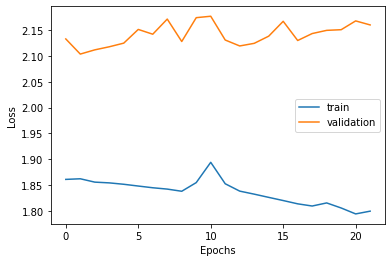

In [82]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.show()

In [57]:
model = load_model(filename)

In [58]:
prediction = model.predict_classes(encode_original_validate)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [59]:
prediction

array([[ 2, 10,  1, ...,  0,  0,  0],
       [ 2, 10,  6, ...,  0,  0,  0],
       [ 2, 30,  1, ...,  0,  0,  0],
       ...,
       [ 2, 30,  1, ...,  0,  0,  0],
       [ 2, 30, 27, ...,  0,  0,  0],
       [ 2, 30,  1, ...,  0,  0,  0]])

# Converting the Output to English

In [60]:
def get_word(n, tokenizer):
  for word, index in tokenizer.word_index.items():
    if index == n:
      return word
  return None

predicted_text = []
for line in prediction:
  temp = []
  for num in range(len(line)):
    word = get_word(line[num], tokenizer_message_train)
    if num > 0:
      if (word == get_word(line[num-1], tokenizer_message_train)) or (word == None):
        temp.append('')
      else:
        temp.append(word)
    else:
      if (word == None):
        temp.append('')
        pass
      else:
        temp.append(word) 
  predicted_text.append(' '.join(temp))

In [61]:
df_result = pd.DataFrame()
df_result['Actual'] = df_validation['message']
df_result['predicted'] = predicted_text

In [87]:
target = list()
result = list()
for sentence in list(df_result.Actual):
  target.append(sentence.split())
for sentence in list(df_result.predicted):
  result.append(sentence.split())

#Evaluation Metric

---

In [106]:
import warnings
warnings.filterwarnings('ignore')
print("BLEU score", corpus_bleu(target, result, weights=(0.25,0.25,0.25,0.25)))

BLEU score 0.7212224211690602


In [150]:
df_result.to_csv("results.csv")

Results and Conclusion:

1. The objective of the problem statement was to develop a language model for translating multi-lingual text to english. The best way to do this is to use an encoder and decoder to build an Seq-Seq model with the help of LSTM's.
2. Directly feeding the given training data to the model and building an embedding layer using the training data did not produce good results as any new word which could occur in the test set couldnt be identified by the model and the data available for training was not enough.
3. The next approach was to check how many different kinds of languages were present in the training set, since using the pre trained embeddings would solve the above problem. Using the fast text language identification API, I found out that there are around 91 different languages.
4. The next step was to use the fasttext's french word embedding's for training the embedding layers for the model, but there was a problem with this method as the word vectors for the other languages were 0 vectors in the matrix. Thus the model wasnt not able to learn enough and gave incorrect results. 
5. Instead of using only one single language embedding, I used the Hatian embedding too for training the embedding layer. The results were a bit better than what I got previously but there wasnt much of an improvement.
6. To improve the results further instead of using all the data in the training set which contained data of all the languages, I filtered the training set with data for only Hatian and French.
After filtering out the data for 2 languages only, the numbers of rows reduced close to 3000 which wasnt sufficient enough to develop a good translation model.